<a href="https://colab.research.google.com/github/GrinderTeam/raiffeisen_challenge/blob/master/notebooks/kiram4chik_baseline_14_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from collections import Counter

In [0]:
train_data = pd.read_csv('/content/drive/My Drive/BANK_case/data/raw/CUP_IT_train_data.csv',  comment='#', parse_dates=['dlk_cob_date'])
test_data = pd.read_csv('/content/drive/My Drive/BANK_case/data/raw/CUP_IT_test_data.csv',  comment='#', parse_dates=['dlk_cob_date'])

In [5]:
num_train_clients = len(set(train_data.cif_id))
#num_test_clients = len(set(test_data.cif_id))

print('Кол-во клиентов в трейне:', num_train_clients)
#print('Кол-во клиентов в тесте:', num_test_clients)

print('Кол-во пересечений клиентов из трейна и теста:', len(set(train_data.cif_id) - set(train_data.cif_id)))

Кол-во клиентов в трейне: 396576
Кол-во пересечений клиентов из трейна и теста: 0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive




---

#BASELINE MODEL

---



In [0]:
targets = train_data.groupby('cif_id').mean().gi_smooth_3m
test_targets = test_data.groupby('cif_id').mean().gi_smooth_3m

In [8]:
a = np.log(targets/10)
test_a = np.log(test_targets/10)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [0]:
indieces_nans = a.isna().apply(lambda x: True if x == False else False).values
test_indieces_nans = test_a.isna().apply(lambda x: True if x == False else False).values

In [11]:
np.sum(a.isna().values), np.sum(test_a.isna().values)

(2518, 733)

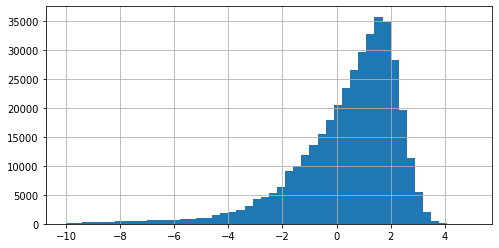

In [12]:
plt.figure(figsize=[8, 4])
plt.subplot(1, 1, 1)
plt.grid(True)
plt.hist(a[indieces_nans], 50, range=(-10, 5));

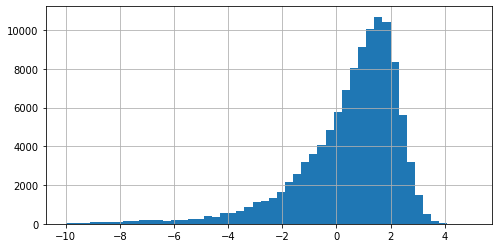

In [13]:
plt.figure(figsize=[8, 4])
plt.subplot(1, 1, 1)
plt.grid(True)
plt.hist(test_a[test_indieces_nans], 50, range=(-10, 5));

In [0]:
columns_without_nans = ['cu_gender', 'payroll_f', 'cur_quantity_pl',
       'cur_quantity_mort', 'cur_quantity_cc', 'cur_quantity_deposits',
       'cur_quantity_dc', 'cur_quantity_accounts', 'cur_quantity_saccounts',
       'cur_quantity_mf', 'dc_cash_spend_v',
        'dc_cash_spend_c', 'cc_cash_spend_v',
       'cc_cash_spend_c', 'dc_pos_spend_v', 'dc_pos_spend_c', 'cc_pos_spend_v',
       'cc_pos_spend_c', 'ca_f', 'rc_session_qnt_cur_mon', 'cur_qnt_sms',
       'active', 'standalone_dc_f', 'standalone_payroll_dc_f',
       'standalone_nonpayroll_dc_f', 'salary', 'cu_age', 'cu_mob',
       'cu_empl_cur_dur_m', 'is_married', 'cu_eduaction_level']

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [0]:
rf_reg = RandomForestRegressor()

In [0]:
X = train_data.groupby('cif_id').mean()[columns_without_nans].values[indieces_nans]
Y = a.values[indieces_nans]

X = X[np.isinf(Y) == False]
Y = Y[np.isinf(Y) == False]

test_X = test_data.groupby('cif_id').mean()[columns_without_nans].values[test_indieces_nans]
test_Y = test_a.values[test_indieces_nans]

test_X = test_X[np.isinf(test_Y) == False]
test_Y = test_Y[np.isinf(test_Y) == False]

In [18]:
rf_reg.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
prediction = rf_reg.predict(test_X)

In [22]:
np.mean(np.abs((test_Y - prediction) / test_Y)) * 100  # MAPE

407.28895565352695

In [23]:
mean_absolute_error(test_Y, prediction) # MAE

0.81088433445913